# PLACEMENT TIME
Let us see what are the main factors and what are not in order to get placed

Download data from 
https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [175]:
data=pd.read_csv("Placement_Data_Full_Class.csv");
data.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [177]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Salary

In [178]:
data["salary"].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

(100000.0, 940000.0)

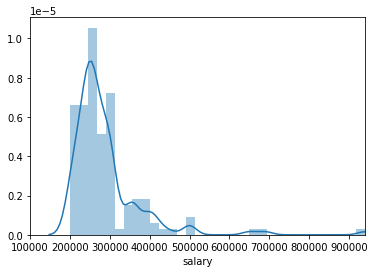

In [179]:
sns.distplot(data["salary"])
plt.xlim([100000,940000])

In [180]:
data.loc[data["salary"].isnull()]["status"].describe()

count             67
unique             1
top       Not Placed
freq              67
Name: status, dtype: object

Person with no placement have NaN as salary so let us put 0.0 as salary .

In [213]:
data["salary"].fillna(0.0,inplace=True)

Make two lists containing **categorical**
and **numerical** features.

In [182]:
categorical=[]
numerical=[]
for colname, coltype in data.dtypes.iteritems():
    if(coltype == "object"):
        categorical.append(colname)
        continue
    if(coltype == "float64"):
        numerical.append(colname)
        continue


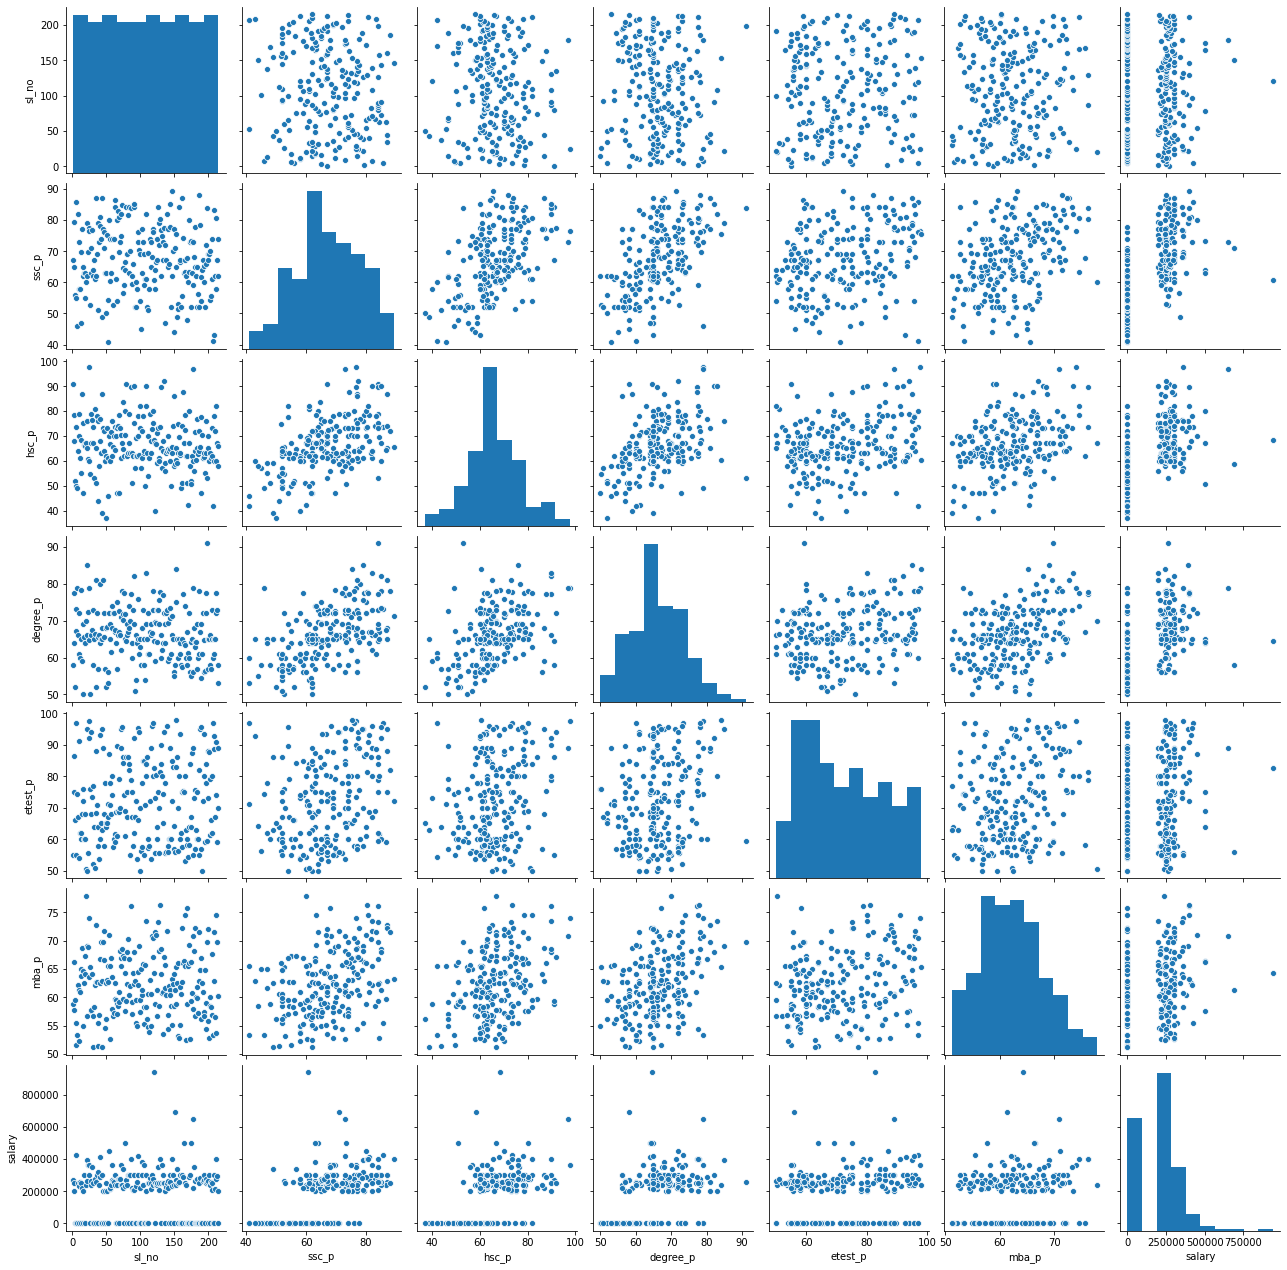

In [183]:
sns.pairplot(data)


### Here salary feature shows it have many outliers
---



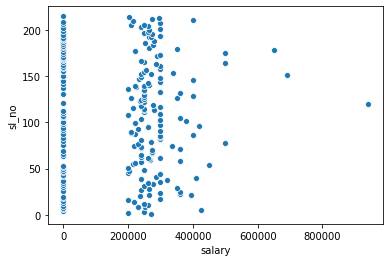

In [185]:
sns.scatterplot(x=data["salary"],y=data["sl_no"]);

Continouous quantitative data description

In [186]:
#numerical

for i in numerical:
  print(i)
  print(data[i].describe())
  print()

ssc_p
count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

hsc_p
count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: hsc_p, dtype: float64

degree_p
count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

etest_p
count    215.000000
mean      72.100558
std       13.275956
min       50.000000
25%       60.000000
50%       71.000000
75%       83.500000
max       98.000000
Name: etest_p, dtype: float64

mba_p
count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

salary
count   

# Average Score 

It is the average of all the other scores.

In [214]:
temp=data["mba_p"]
for i in numerical:
  if (i == "salary"  or i == "mba_p"):
    continue
  temp=temp + data[i]
temp=temp * 0.2
data["avg_score"]=temp

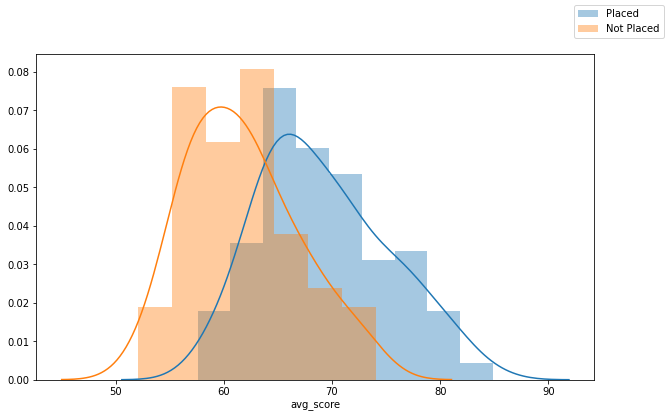

In [215]:
fig = plt.figure(figsize=(10,6))

sns.distplot(data.loc[data["status"] == "Placed"]["avg_score"],label="Placed")
sns.distplot(data.loc[data["status"] == "Not Placed"]["avg_score"],label="Not Placed")
fig.legend(labels=['Placed','Not Placed'])
plt.show()




*   Avg_Score above 75 would get you placed
*   Avg_Score below 60 would not get you placec.
 



***Let us plot with all other scores too***

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


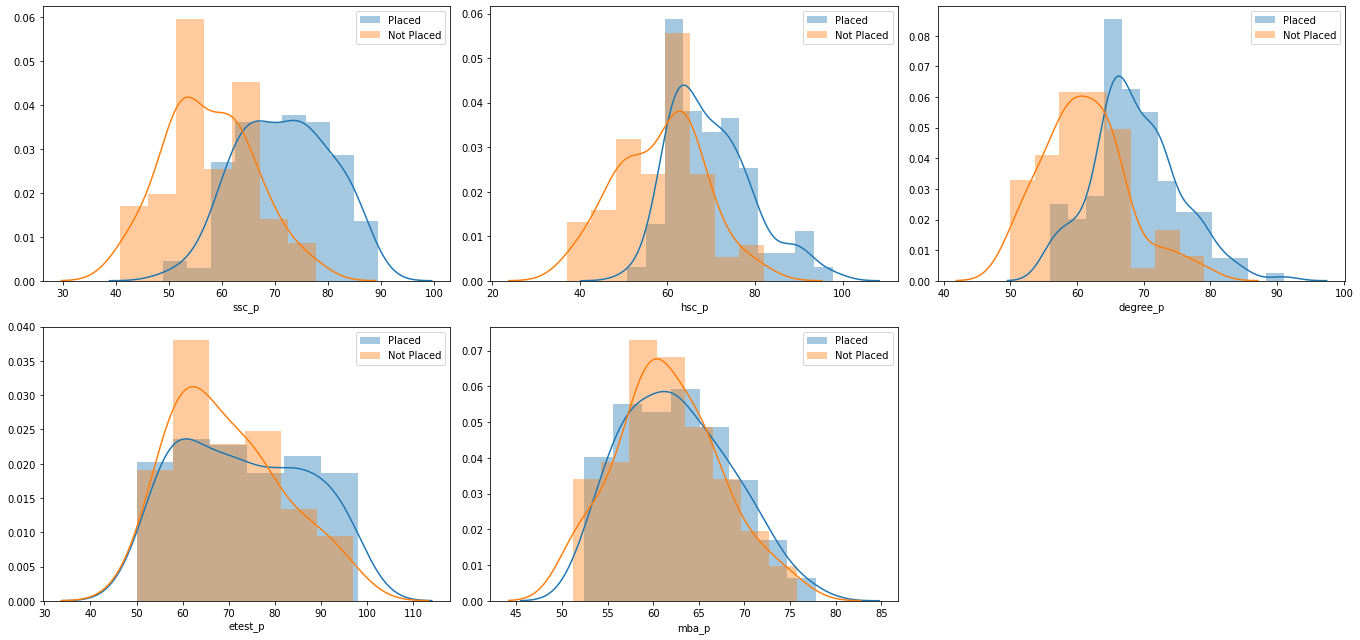

In [191]:
fig,ax = plt.subplots(2,3,figsize=(19,9))
index=0
for i in range(2):
  for j in range(3):
    sns.distplot(data.loc[data["status"] == "Placed"][numerical[index]],label="Placed",ax=ax[i][j])
    sns.distplot(data.loc[data["status"] == "Not Placed"][numerical[index]],label="Not Placed",ax=ax[i][j])
    ax[i][j].legend(labels=['Placed','Not Placed'])
    # ax[i][j].set_title(numerical[index])
    index+=1
fig.delaxes(ax[1][2])
plt.tight_layout()
# plt.show()


* it shows etes_p and mba_p does not play much role in placement status
*  in ssc_p student need tos have above 90 to get placed and if he have less than 40 he will not get placed
* in hsc_p 90> for placed and <40 to not placed
* in degree_p it lies above 90 and less 55

* the scores which play role in placement  are scc_p(imp) and hsc_p (less imp)



## Gender 

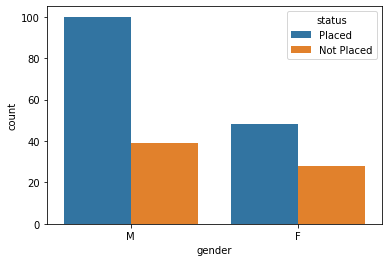

In [194]:
sns.countplot(data["gender"],hue=data["status"])
#so the data shows male got placed

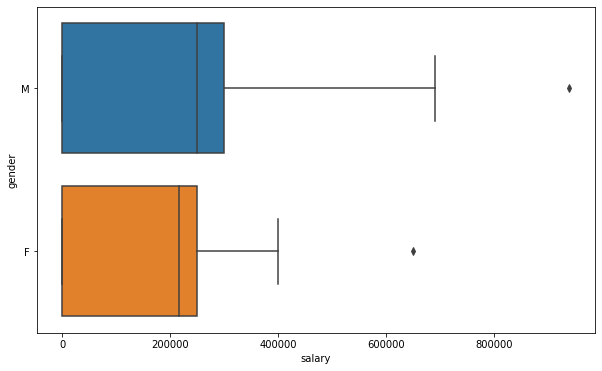

In [195]:
plt.figure(figsize =(10,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

Thus on avg male are getting more salary than female



---

# Specialisation

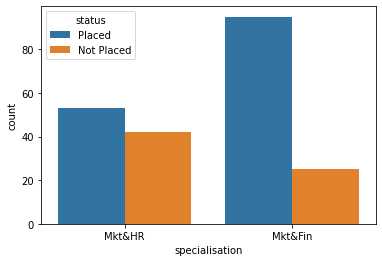

In [216]:

sns.countplot(data["specialisation"],hue=data["status"])


So Mkt&Fin are getting more placements.

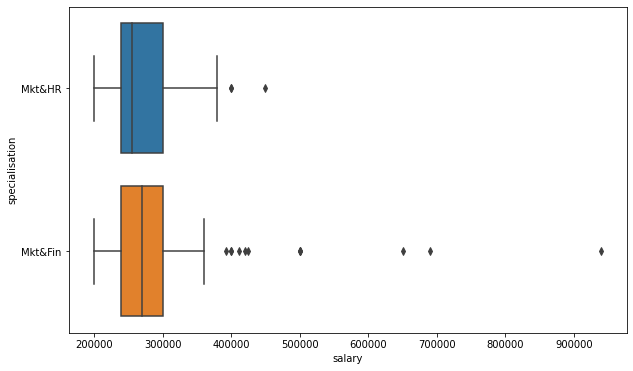

In [199]:
plt.figure(figsize =(10,6))
sns.boxplot("salary", "specialisation", data=data.loc[data["status"]=="Placed"])
plt.show()



*   avg_salary of Mkt&Fin is higher than Mkt&Hr
*   Mkt&Hr have more outliers in salary





---

# WORK EXPERIENCE

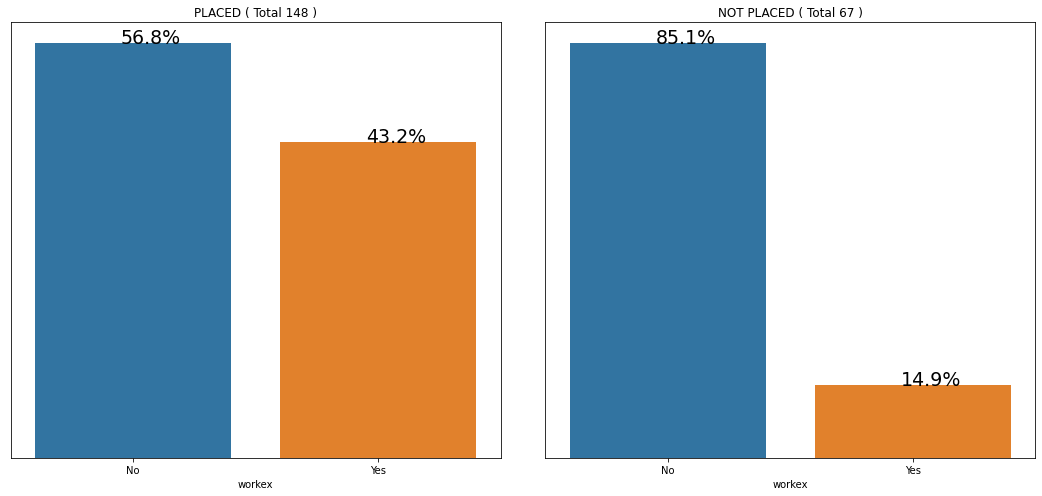

In [217]:

fig,ax=plt.subplots(1,2,figsize=(15,7))

sns.countplot(data.loc[data["status"]=="Placed"]["workex"],ax=ax[0])
ax[0].set_title("PLACED");
total=len(data.loc[data["status"]=="Placed"]["workex"])

for p in ax[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax[0].annotate(percentage, (x, y), size = 19)
sns.countplot(data.loc[data["status"]=="Not Placed"]["workex"],ax=ax[1])
ax[0].set_title("PLACED"+" ( Total "+str(total)+" )");

total=len(data.loc[data["status"]=="Not Placed"]["workex"])
ax[1].set_title("NOT PLACED"+" ( Total "+str(total)+" )");

for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax[1].annotate(percentage, (x, y), size = 19)
plt.tight_layout()

ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)



WORK EX plays significant reason why people does not get placed.

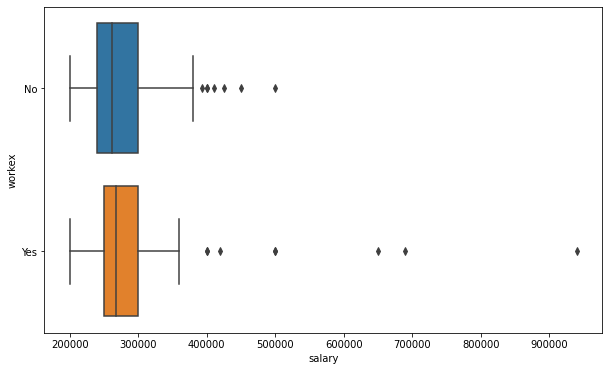

In [218]:
plt.figure(figsize =(10,6))
sns.boxplot("salary", "workex", data=data.loc[data["status"]=="Placed"])
plt.show()

People with work_ex have bit higher avg_salary than people with non experience.



---
# DEGREE TYPE


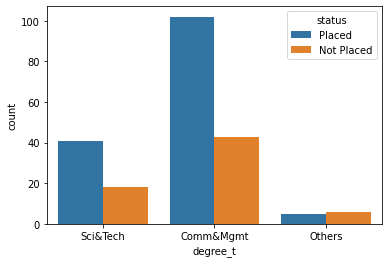

In [219]:
#degree_t

sns.countplot(data["degree_t"],hue=data["status"]);


WOW!! Comm&Mgmt is also imp reason to get placed.

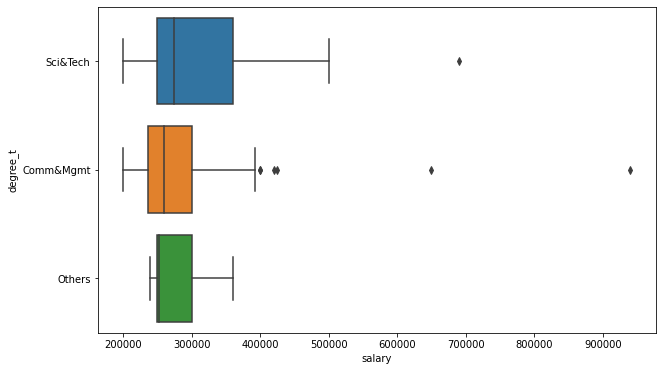

In [210]:
plt.figure(figsize =(10,6))
sns.boxplot("salary", "degree_t", data=data.loc[data["status"]=="Placed"])
plt.show()



*   Average salary of comm&mgmt is lower than sci&tech.
*   Large numbers of outliers in comm&mgmt





---
( MALE + (Avg_score>80) + workex==YES(less imp.) + specialisation == Mkt&Fn + degree_t==Comm&Mngmt ) == [HIGHER CHANCES OF GETTING PLACED]

## YOU COULD BE AN OUTLIER

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQh2lZN5RQG50hryPtOK4-j5lY3Uz74MwpHyw&usqp=CAU)
